# Understanding Random Forests Classifiers in Python
Learn about Random Forests and build your own model in Python, for both classification and regression.
Random forests is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.

Random forests has a variety of applications, such as recommendation engines, image classification and feature selection. It can be used to classify loyal loan applicants, identify fraudulent activity and predict diseases. It lies at the base of the Boruta algorithm, which selects important features in a dataset.

In this tutorial, you are going to learn about all of the following:
- The random forests algorithm
- How does the classifier work?
- Its advantages and disadvantages
- Finding important features
- Comparision between random forests and decision trees
- Building a classifier with scikit-learn
- Finding important features with scikit-learn

## The Random Forests Algorithm
Let’s understand the algorithm in layman’s terms. Suppose you want to go on a trip and you would like to travel to a place which you will enjoy.

So what do you do to find a place that you will like? You can search online, read reviews on travel blogs and portals, or you can also ask your friends.

Let’s suppose you have decided to ask your friends, and talked with them about their past travel experience to various places. You will get some recommendations from every friend. Now you have to make a list of those recommended places. Then, you ask them to vote (or select one best place for the trip) from the list of recommended places you made. The place with the highest number of votes will be your final choice for the trip.

In the above decision process, there are two parts. 

- First, asking your friends about their **individual travel experience** and **getting one recommendation** out of multiple places they have visited. This part is like using the decision tree algorithm. Here, each friend makes a selection of the places he or she has visited so far.

- The second part, after collecting all the recommendations, is the **voting procedure** for **selecting the best place** in the list of recommendations. This whole process of getting recommendations from friends and voting on them to find the best place is known as the **random forests algorithm**.

It technically is an **ensemble** method (based on the divide-and-conquer approach) of decision trees generated on a randomly split dataset. This collection of decision tree classifiers is also known as the forest. The individual decision trees are generated using an attribute selection indicator such as **information gain**, **gain ratio**, and **Gini index** for each attribute. Each tree depends on an independent random sample. In a classification problem, each tree votes and the most popular class is chosen as the final result. In the case of regression, the average of all the tree outputs is considered as the final result. It is simpler and more powerful compared to the other non-linear classification algorithms.

## How does the classifier work?
It works in four steps:

1. Select random samples from a given dataset.
2. Construct a decision tree for each sample and get a prediction result from each decision tree.
3. Perform a vote for each predicted result.
4. Select the prediction result with the most votes as the final prediction.

<img src = 'http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526467744/voting_dnjweq.jpg' />

## Advantages:
- Random forests is considered as a highly **accurate** and **robust** method because of the number of decision trees participating in the process.
- It does not suffer from the **overfitting** problem. The main reason is that it takes the average of all the predictions, which cancels out the biases.
- The algorithm can be used in both **classification** and **regression** problems.
- Random forests can also handle **missing values**. There are two ways to handle these: using median values to replace continuous variables, and computing the proximity-weighted average of missing values.
- You can get the relative feature importance, which helps in **selecting the most contributing features** for the classifier.

## Disadvantages:
- Random forests is **slow** in generating predictions because it has multiple decision trees. Whenever it makes a prediction, all the trees in the forest have to make a prediction for the same given input and then perform voting on it. This whole process is time-consuming.
- The model is **difficult to interpret** compared to a decision tree, where you can easily make a decision by following the path in the tree.

__NOTE__: In data science, we use RF a lot since we do not care as much as interpretation of the results.

## Finding important features
Random forests also offers a good **feature selection** indicator. `Scikit-learn` provides an extra variable with the model, which shows the relative importance or contribution of each feature in the prediction. It automatically computes the `relevance score` of each feature in the training phase. Then it scales the relevance down so that the sum of all scores is `1`. __Higher relevance score means more important feature__.

This score will help you choose the most important features and drop the least important ones for model building.

Random forest uses `gini importance` or `mean decrease in impurity` (MDI) to calculate the importance of each feature. Gini importance is also known as the total decrease in node impurity. This is how much the model fit or accuracy decreases when you drop a variable. The larger the decrease, the more significant the variable is. Here, the mean decrease is a significant parameter for variable selection. The Gini index can describe the **overall explanatory power** of the variables.

## Random Forests vs Decision Trees
- Random forests is a set of multiple decision trees.
- Deep decision trees may suffer from overfitting, but random forests prevents overfitting by creating trees on random subsets.
- Decision trees are computationally faster.
- Random forests is difficult to interpret, while a decision tree is easily interpretable and can be converted to rules.

## Building a Classifier using Scikit-learn
You will be building a model on the `iris flower dataset`, which is a very famous classification set. It comprises the `sepal length`, `sepal width`, `petal length`, `petal width`, and `type of flowers`. There are three species or classes: setosa, versicolor, and virginia. You will build a model to classify the type of flower. The dataset is available in the scikit-learn library or you can download it from the UCI Machine Learning Repository.

Start by importing the datasets library from scikit-learn, and load the iris dataset with `load_iris()`.

In [1]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()

You can print the target and feature names, to make sure you have the right dataset, as such:

In [2]:
# print the label species(setosa, versicolor,virginica)
print(iris.target_names)

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


It's a good idea to always explore your data a bit, so you know what you're working with. Here, you can see the first five rows of the dataset are printed, as well as the target variable for the whole dataset.

In [3]:
# print the iris data (top 5 records)
print(iris.data[0:5])

# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Here, you can create a `pandas` DataFrame of the iris dataset the following way.

In [4]:
# Creating a DataFrame of given iris dataset.
import pandas as pd
data = pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Now we can start building our classifier. First, you separate the columns into predictor and target variables (or features and labels). Then you split those variables into a training and test set.

In [5]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019) # 70% training and 30% test

After splitting, you will train the model on the training set and perform predictions on the test set.

In [6]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

After training, check the predictive performance using actual and predicted values.

In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       1.00      0.90      0.95        10
          2       0.94      1.00      0.97        16

avg / total       0.98      0.98      0.98        45



You can see that our model is well trained at a f1-score of `98%`.

Let's try applying the trained model on a totally unseen item, for example:

- sepal length = 3
- sepal width = 5
- petal length = 4
- petal width = 2

__NOTE__: this is called model deployment.

In [8]:
clf.predict([[3, 5, 4, 2]])

array([1])

Here, 2 indicates the flower type Virginica.


## Finding Important Features in Scikit-learn
Here, you are finding important features or selecting features in the IRIS dataset. In scikit-learn, you can perform this task in the following steps:

- First, you need to create a random forests model.
- Second, use the feature importance variable to see feature importance scores.
- Third, visualize these scores using the seaborn library.

In [9]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.444546
petal width (cm)     0.421845
sepal length (cm)    0.086596
sepal width (cm)     0.047014
dtype: float64

You can also visualize the feature importance. Visualizations are **easy to understand and interpretable**.

For visualization, you can use a combination of `matplotlib` and `seaborn`. Because `seaborn` is built on top of `matplotlib`, it offers a number of customized themes and provides additional plot types. `Matplotlib` is a superset of `seaborn` and both are equally important for good visualizations.

__NOTE__: Checking and displaying the feature importances, regardless of applying feature engineering, are always good practices. 

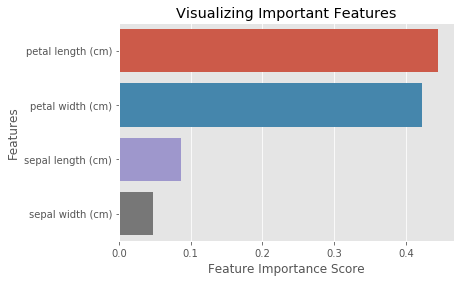

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend(iris.feature_names)
plt.show()

## Generating the Model on Selected Features
Here, you can remove the "sepal width" feature because it has very low importance, and select the 3 remaining features.

__NOTE__: this is a feature selection step.

In [12]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into features and labels
X=data[['petal length', 'petal width','sepal length']]  # Removed feature "sepal length"
y=data['species']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2019) # 70% training and 30% test

After spliting, you will generate a model on the selected training set features, perform predictions on the selected test set features, and compare actual and predicted values. 

__NOTE__: We use the same `ramdom_state` so that we can compare model performances.

In [13]:
#from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
#from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       1.00      0.90      0.95        10
          2       0.94      1.00      0.97        16

avg / total       0.98      0.98      0.98        45



You can see that after removing the least important features (sepal length), the accuracy did not decrease. This is because you removed misleading data and noise, resulting in a comparable performance. The main value in this step is that a lesser amount of features also reduces the training time.

## Conclusion
Congratulations, you have made it to the end of this tutorial!

In this tutorial, you have learned what random forests is, how it works, finding important features, the comparison between random forests and decision trees, advantages and disadvantages. You have also learned model building, evaluation and finding important features in `scikit-learn`. 